# Indonesia AI Final Project

## Project: Heart Disease

### Collecting Data

The data is sourced from: https://www.kaggle.com/datasets/mexwell/heart-disease-dataset/data

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_percentage_error, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [4]:
#Import Data Train & Data Test
import pandas as pd
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',100)
import numpy as np

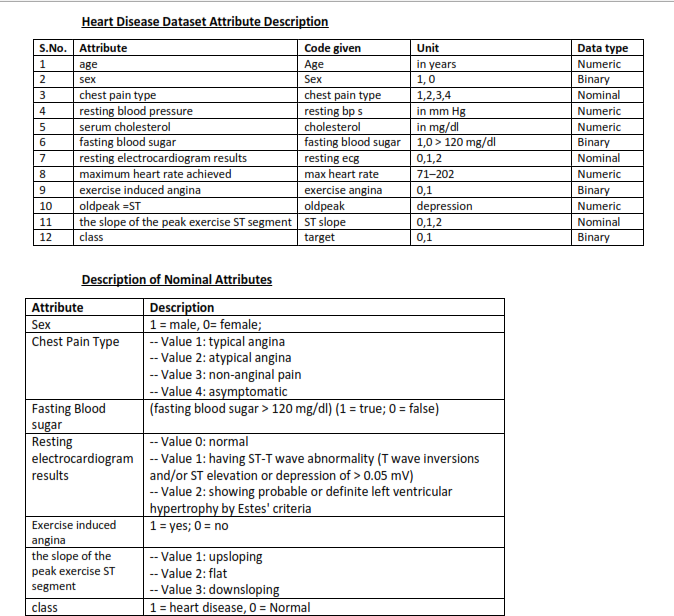

In [5]:
df_train = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [6]:
df_train

age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0            1              98                0   
3                       0            0             108                1   
4                       0            0             122                0   
...                   ...          ...             ...              ...   
1185                    0            0             132                0   
1186                    1            0             141                0   
1187                    0            0             115                1   
1188                    0            2             174                0   
1189                    0            0             173                0   

      oldpeak  ST slope  target  
0         0.0         1       0  
1         1.0         2       1  
2         0.0         1       0  
3         1.5         2       1  
4         0.0         1       0  
...       ...       ...     ...  
1185      1.2         2       1  
1186      3.4         2       1  
1187      1.2         2       1  
1188      0.0         2       1  
1189      0.0         1       0  

[1190 rows x 12 columns]

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [36]:
df_train['target'].unique()

array([0, 1], dtype=int64)

### Exploratory Data Analysis (EDA)

#### A) Check Unique Values

In [8]:
isnull = df_train.isnull().sum()
print(isnull)

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [9]:
df_train.describe()

age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636         0.487360   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      121.000000         0.000000   
50%               0.000000     0.000000      140.500000         0.000000   
75%               0.000000     2.000000      160.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

           oldpeak     ST slope       target  
count  1190.000000  1190.000000  1190.000000  
mean      0.922773     1.624370     0.528571  
std       1.086337     0.610459     0.499393  
min      -2.600000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.600000     2.000000     1.000000  
75%       1.600000     2.000000     1.000000  
max       6.200000     3.000000     1.000000

In [10]:
for column in df_train.columns:
  print('{} - {} - Unique Values: {}'.format(column, df_train[column].dtypes, df_train[column].unique()))

age - int64 - Unique Values: [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
sex - int64 - Unique Values: [1 0]
chest pain type - int64 - Unique Values: [2 3 4 1]
resting bp s - int64 - Unique Values: [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
cholesterol - int64 - Unique Values: [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 1

#### B) Check Target Distribution

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Total')

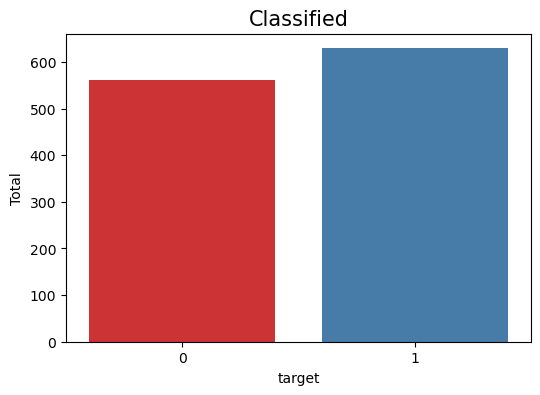

In [12]:
#count Target
plt.figure(figsize=(6,4))
sns.countplot(x = df_train.target,  palette='Set1')
plt.title('Classified', fontsize=15)
plt.xlabel('target',fontsize=10)
plt.ylabel('Total',fontsize=10)

#### C) Check Categorical Feature

AttributeError: 'numpy.int64' object has no attribute 'startswith'

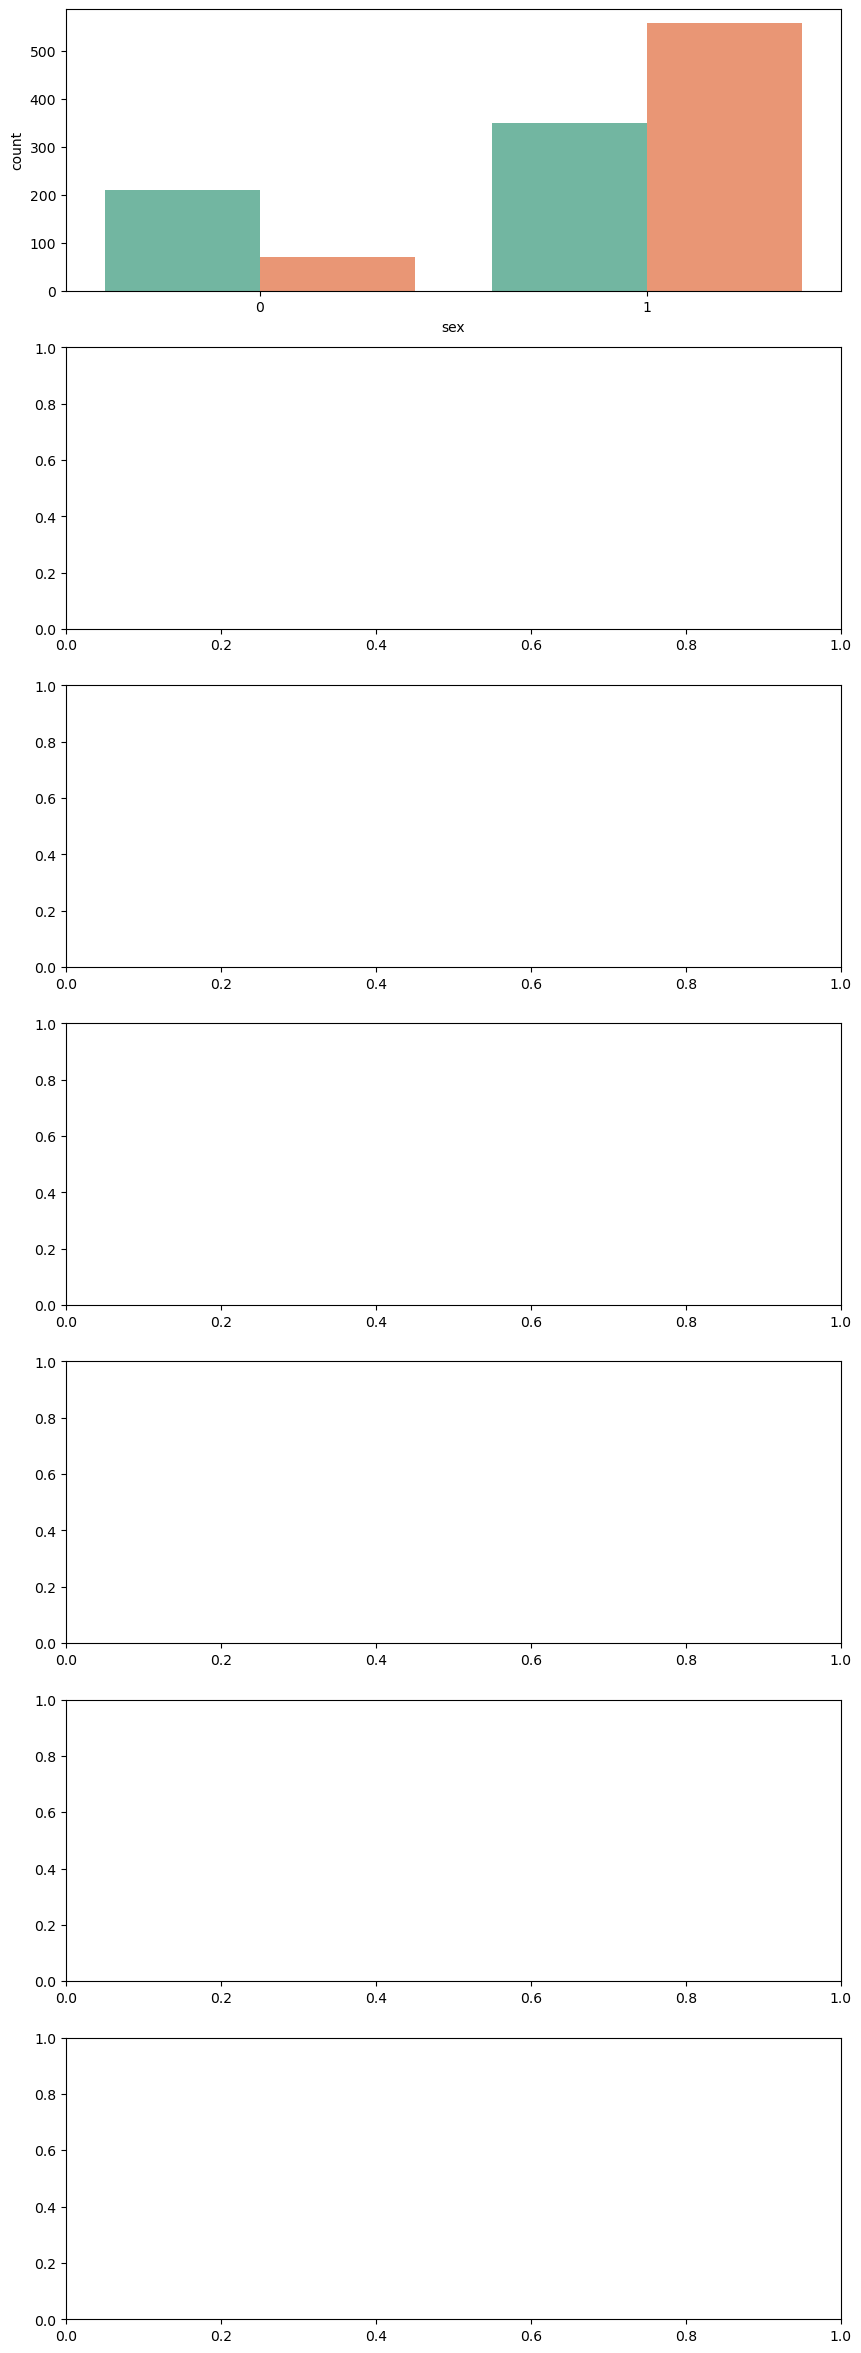

In [14]:
cols = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']
fig, axes = plt.subplots(nrows= len(cols), ncols=1, figsize=(10, 30))


for i in range(len(cols)):
    sns.countplot(x=cols[i], hue='target', data=df_train, ax=axes[i], palette="Set2")

####* Check Numerical Features

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

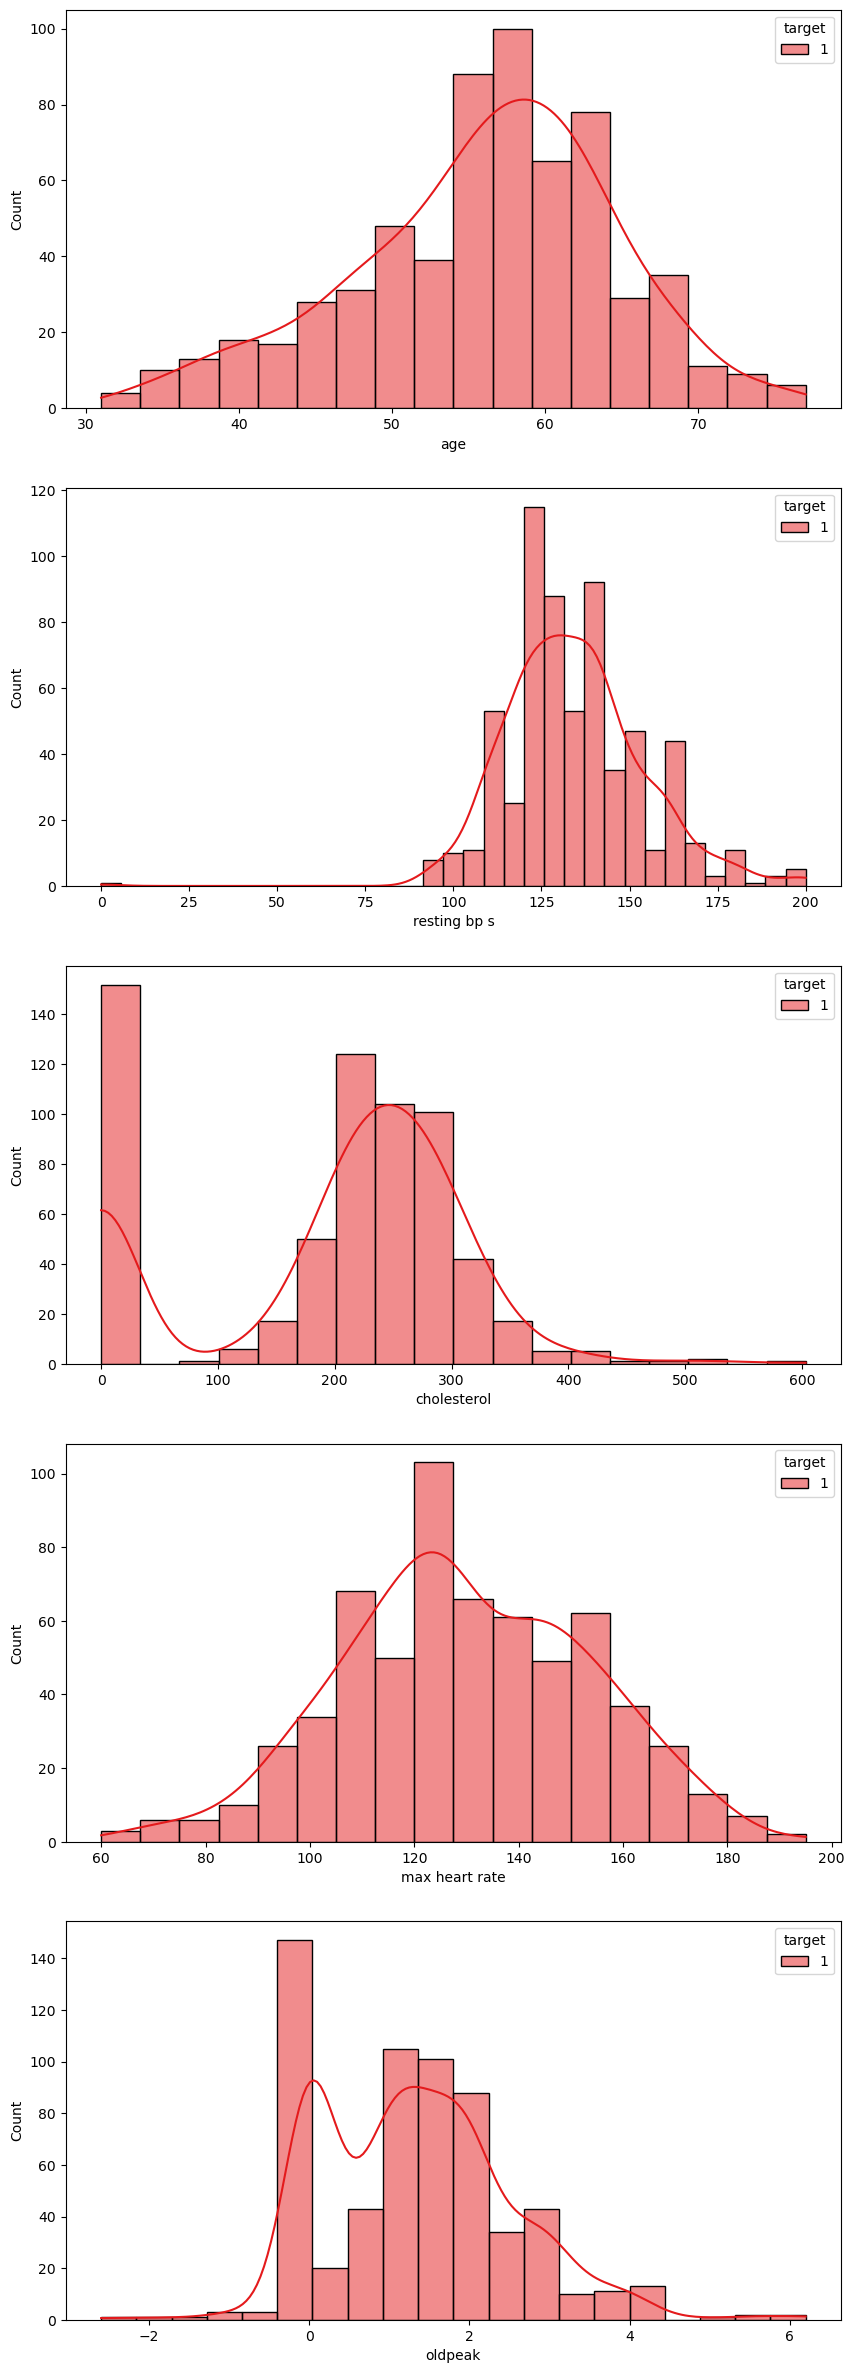

In [15]:
cols_num = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

fig, axes1 = plt.subplots(nrows= len(cols_num), ncols=1, figsize=(10, 30))


for i in range(len(cols_num)):
    sns.histplot(x=cols_num[i], hue='target', data=df_train[df_train['target']==1],kde=True, ax=axes1[i], palette="Set1")

##2_Preprocessing

###A) Check Outlier

Numerical

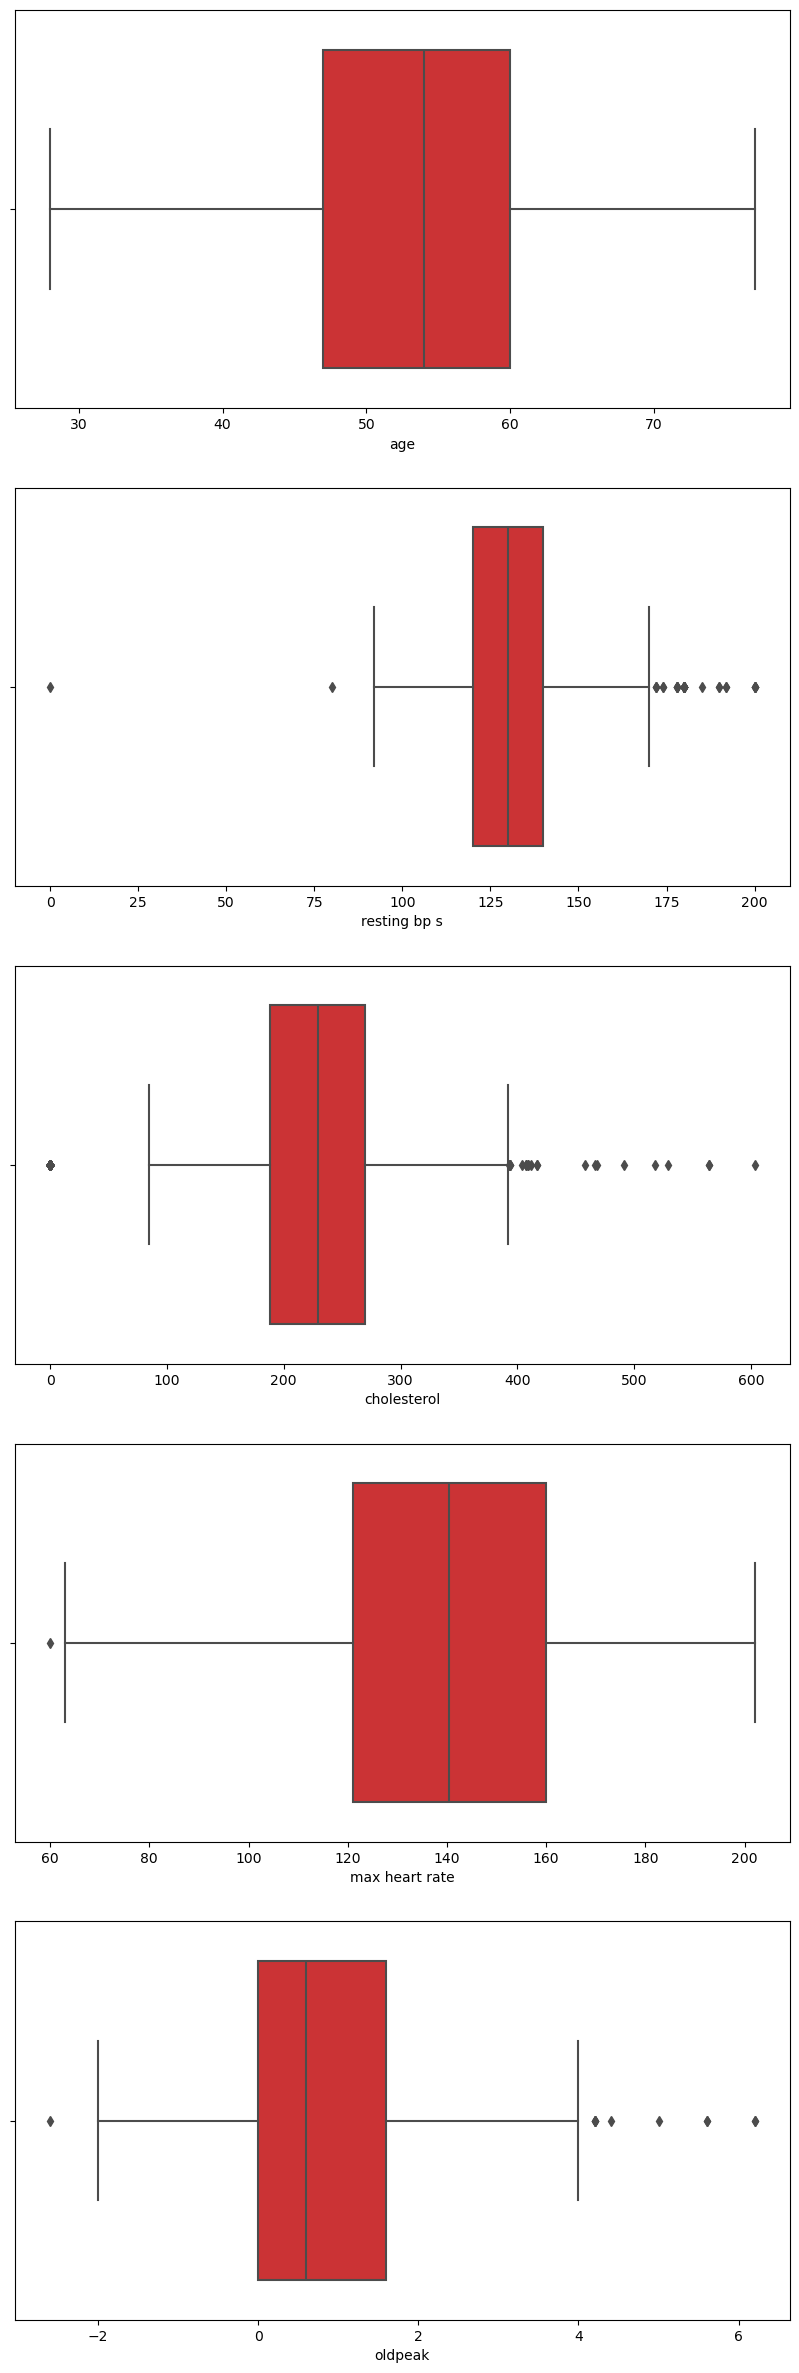

In [16]:
cols_num = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
fig, axes1 = plt.subplots(nrows= len(cols_num), ncols=1, figsize=(10, 30))

for i in range(len(cols_num)):
    #sns.histplot(x=cols_num[i], hue='target', data=df_train[df_train['target']==1],kde=True, ax=axes1[i], palette="Set1")
    sns.boxplot(x=cols_num[i], data=df_train, ax=axes1[i], palette="Set1")

####Remove Outlier

In [17]:
def plot_outliers_and_replace_with_modus(df, cols_num, cols=None):

  if cols is None:
    cols = df.columns.tolist()

  outliers = {}  # Dictionary to store identified outliers

  for col in cols_num:
    # Calculate Interquartile Range (IQR)
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # Identify outliers based on IQR rule
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  # Replace outliers with modus
  for col, outlier_df in outliers.items():
    modus = outlier_df[col].mode()  # Get the modus
    if not modus.empty:  # Check if the modus is not empty
      modus = modus.iloc[0]  # Get the first element
    else:
      modus = df[col].mean()  # Replace with the mean if modus is empty
    df.loc[outlier_df.index, col] = modus  # Replace outliers with modus

  return df


In [18]:
df_train_modus = plot_outliers_and_replace_with_modus(df_train.copy(), cols_num)

In [19]:
df_train_modus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


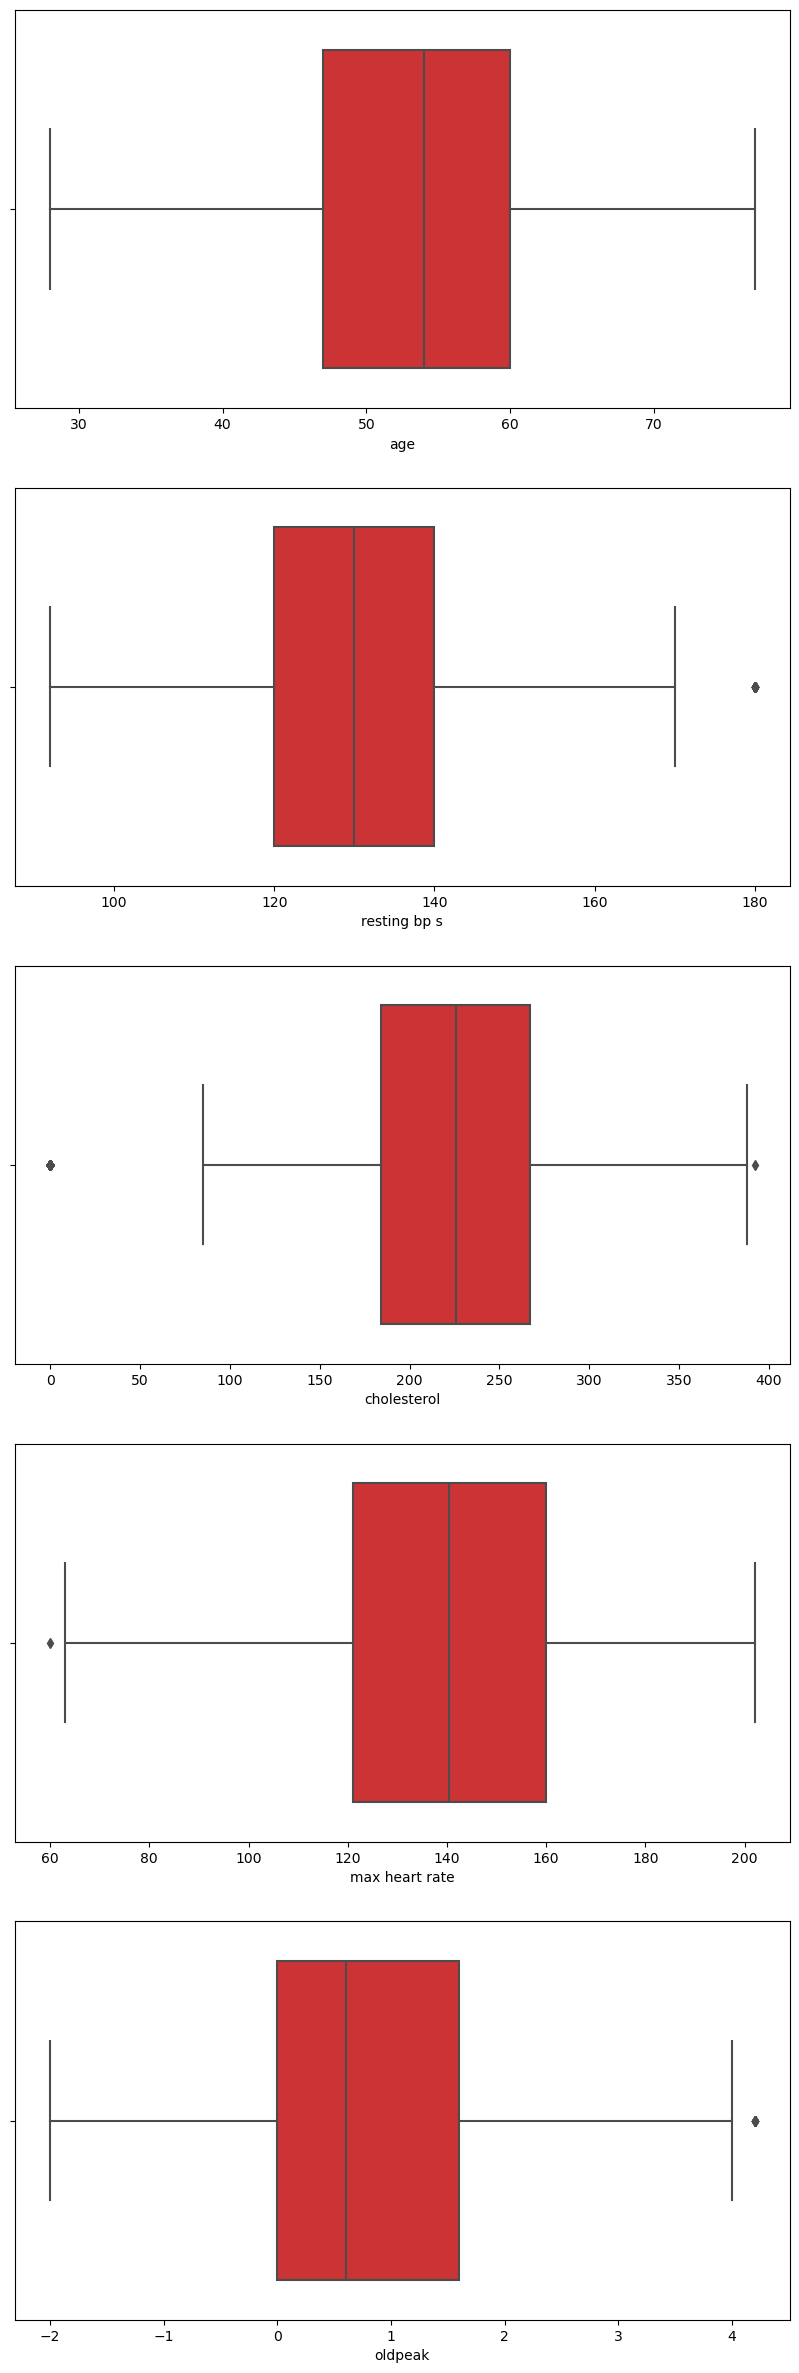

In [20]:
cols_num = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
fig, axes1 = plt.subplots(nrows= len(cols_num), ncols=1, figsize=(10, 30))

for i in range(len(cols_num)):
    #sns.histplot(x=cols_num[i], hue='target', data=df_train[df_train['target']==1],kde=True, ax=axes1[i], palette="Set1")
    sns.boxplot(x=cols_num[i], data=df_train_modus, ax=axes1[i], palette="Set1")

###B) Check Correlation

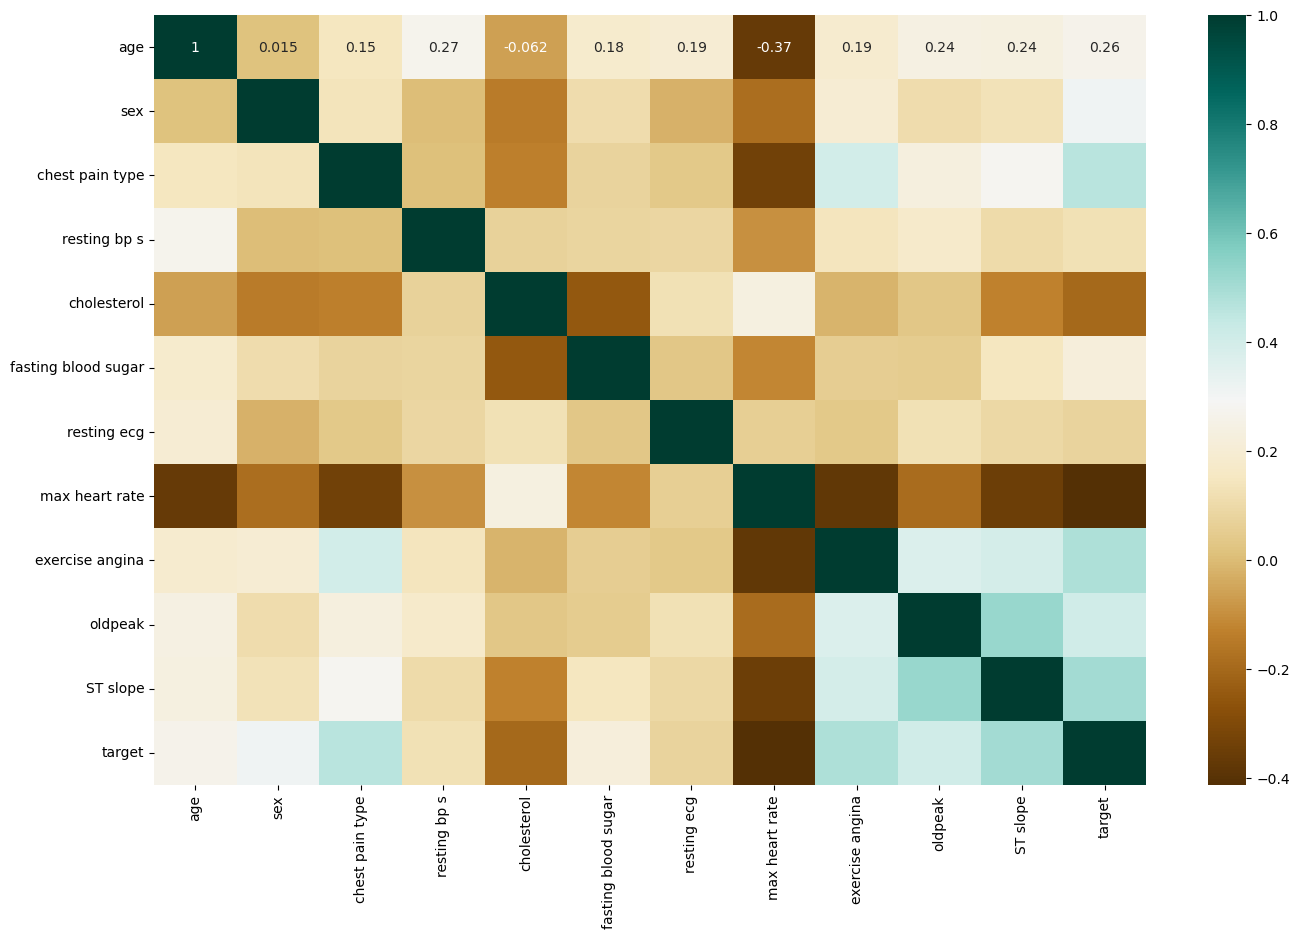

In [21]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train_modus.corr(),cmap="BrBG",annot=True)
plt.show()

### Prepare Data Training & Data testing

In [94]:
y= df_train_modus['target']
X = df_train_modus.drop('target',axis=1)

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [96]:
X_train.shape, X_test.shape

((833, 11), (357, 11))

### Modelling Classifiers

#### 1) Logistic Regression

In [97]:
# Preprocessing
from sklearn.model_selection import KFold

# Feature Importance
import shap

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


In [98]:
def EvaluateClassifier(y_test, predicted):
    recall = recall_score(y_test, predicted)
    accuracy = accuracy_score(y_test, predicted)
    precision = precision_score(y_test, predicted)
    f1 = f1_score(y_test, predicted)
    class_report = classification_report(y_test, predicted)
    conf = confusion_matrix(y_test, predicted)

    print('_________________________________________________________')
    print('-----------------Model Evaluation------------------------')
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"F1-Score: {f1}")
    print('_________________________________________________________')
    print('------------------Classification Report------------------')
    print(class_report)
    print('_________________________________________________________')
    print('--------------------Confusion Matrix---------------------')
    print(conf)
    print('_________________________________________________________')

In [99]:
log_model = LogisticRegression(random_state = 42)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [100]:
print("Model: Logistic Regression")
EvaluateClassifier(y_test, log_model.predict(X_test))

Model: Logistic Regression
_________________________________________________________
-----------------Model Evaluation------------------------
Recall: 0.8375634517766497
Accuracy: 0.8151260504201681
Precision: 0.8291457286432161
F1-Score: 0.8333333333333334
_________________________________________________________
------------------Classification Report------------------
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       160
           1       0.83      0.84      0.83       197

    accuracy                           0.82       357
   macro avg       0.81      0.81      0.81       357
weighted avg       0.81      0.82      0.82       357

_________________________________________________________
--------------------Confusion Matrix---------------------
[[126  34]
 [ 32 165]]
_________________________________________________________


#### 2) Decision Tree

In [101]:
dtree_model = DecisionTreeClassifier(random_state = 42)
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [166]:
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    max_depth = int(max_depth)
    min_samples_leaf = int(min_samples_leaf)
    min_samples_split = int(min_samples_split)

    dtree = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    return cross_val_score(dtree, X_train, y_train, cv = 5, scoring = 'f1').mean()

pbounds = {
    'max_depth': (1, 100),
    'min_samples_split': (2, 16),
    'min_samples_leaf': (1, 16),
}

dtree_bo = BayesianOptimization(
    f=dtree_cv, 
    pbounds=pbounds, 
    random_state=42
)
dtree_bo.maximize(n_iter=64)

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.8091    | 38.08     | 15.26     | 12.25     |
| 2         | 0.8305    | 60.27     | 3.34      | 4.184     |
| 3         | 0.8066    | 6.75      | 13.99     | 10.42     |
| 4         | 0.8173    | 71.1      | 1.309     | 15.58     |
| 5         | 0.8384    | 83.41     | 4.185     | 4.546     |
| 6         | 0.8305    | 83.66     | 3.664     | 4.228     |
| 7         | 0.8384    | 82.4      | 4.697     | 5.125     |
| 8         | 0.8412    | 83.8      | 5.219     | 6.072     |
| 9         | 0.8354    | 83.61     | 6.916     | 3.824     |
| 10        | 0.8354    | 86.45     | 6.358     | 4.997     |
| 11        | 0.8484    | 84.24     | 7.789     | 7.675     |
| 12        | 0.8354    | 85.64     | 6.876     | 9.21      |
| 13        | 0.8313    | 82.3      | 8.8       | 7.828     |
| 14        | 0.8278    | 85.58     | 9.466     | 6.152     |
| 15    

In [167]:
best_params = dtree_bo.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_samples_leaf'] = int(best_params['min_samples_leaf'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])

dtree_best = DecisionTreeClassifier(
    max_depth=best_params['max_depth'], 
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)
dtree_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=84, min_samples_leaf=7, min_samples_split=7,
                       random_state=42)

In [171]:
print("Model: Decision Tree Classifier")
EvaluateClassifier(y_test, dtree_model.predict(X_test))

Model: Decision Tree Classifier
_________________________________________________________
-----------------Model Evaluation------------------------
Recall: 0.817258883248731
Accuracy: 0.8207282913165266
Precision: 0.8518518518518519
F1-Score: 0.8341968911917098
_________________________________________________________
------------------Classification Report------------------
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       160
           1       0.85      0.82      0.83       197

    accuracy                           0.82       357
   macro avg       0.82      0.82      0.82       357
weighted avg       0.82      0.82      0.82       357

_________________________________________________________
--------------------Confusion Matrix---------------------
[[132  28]
 [ 36 161]]
_________________________________________________________


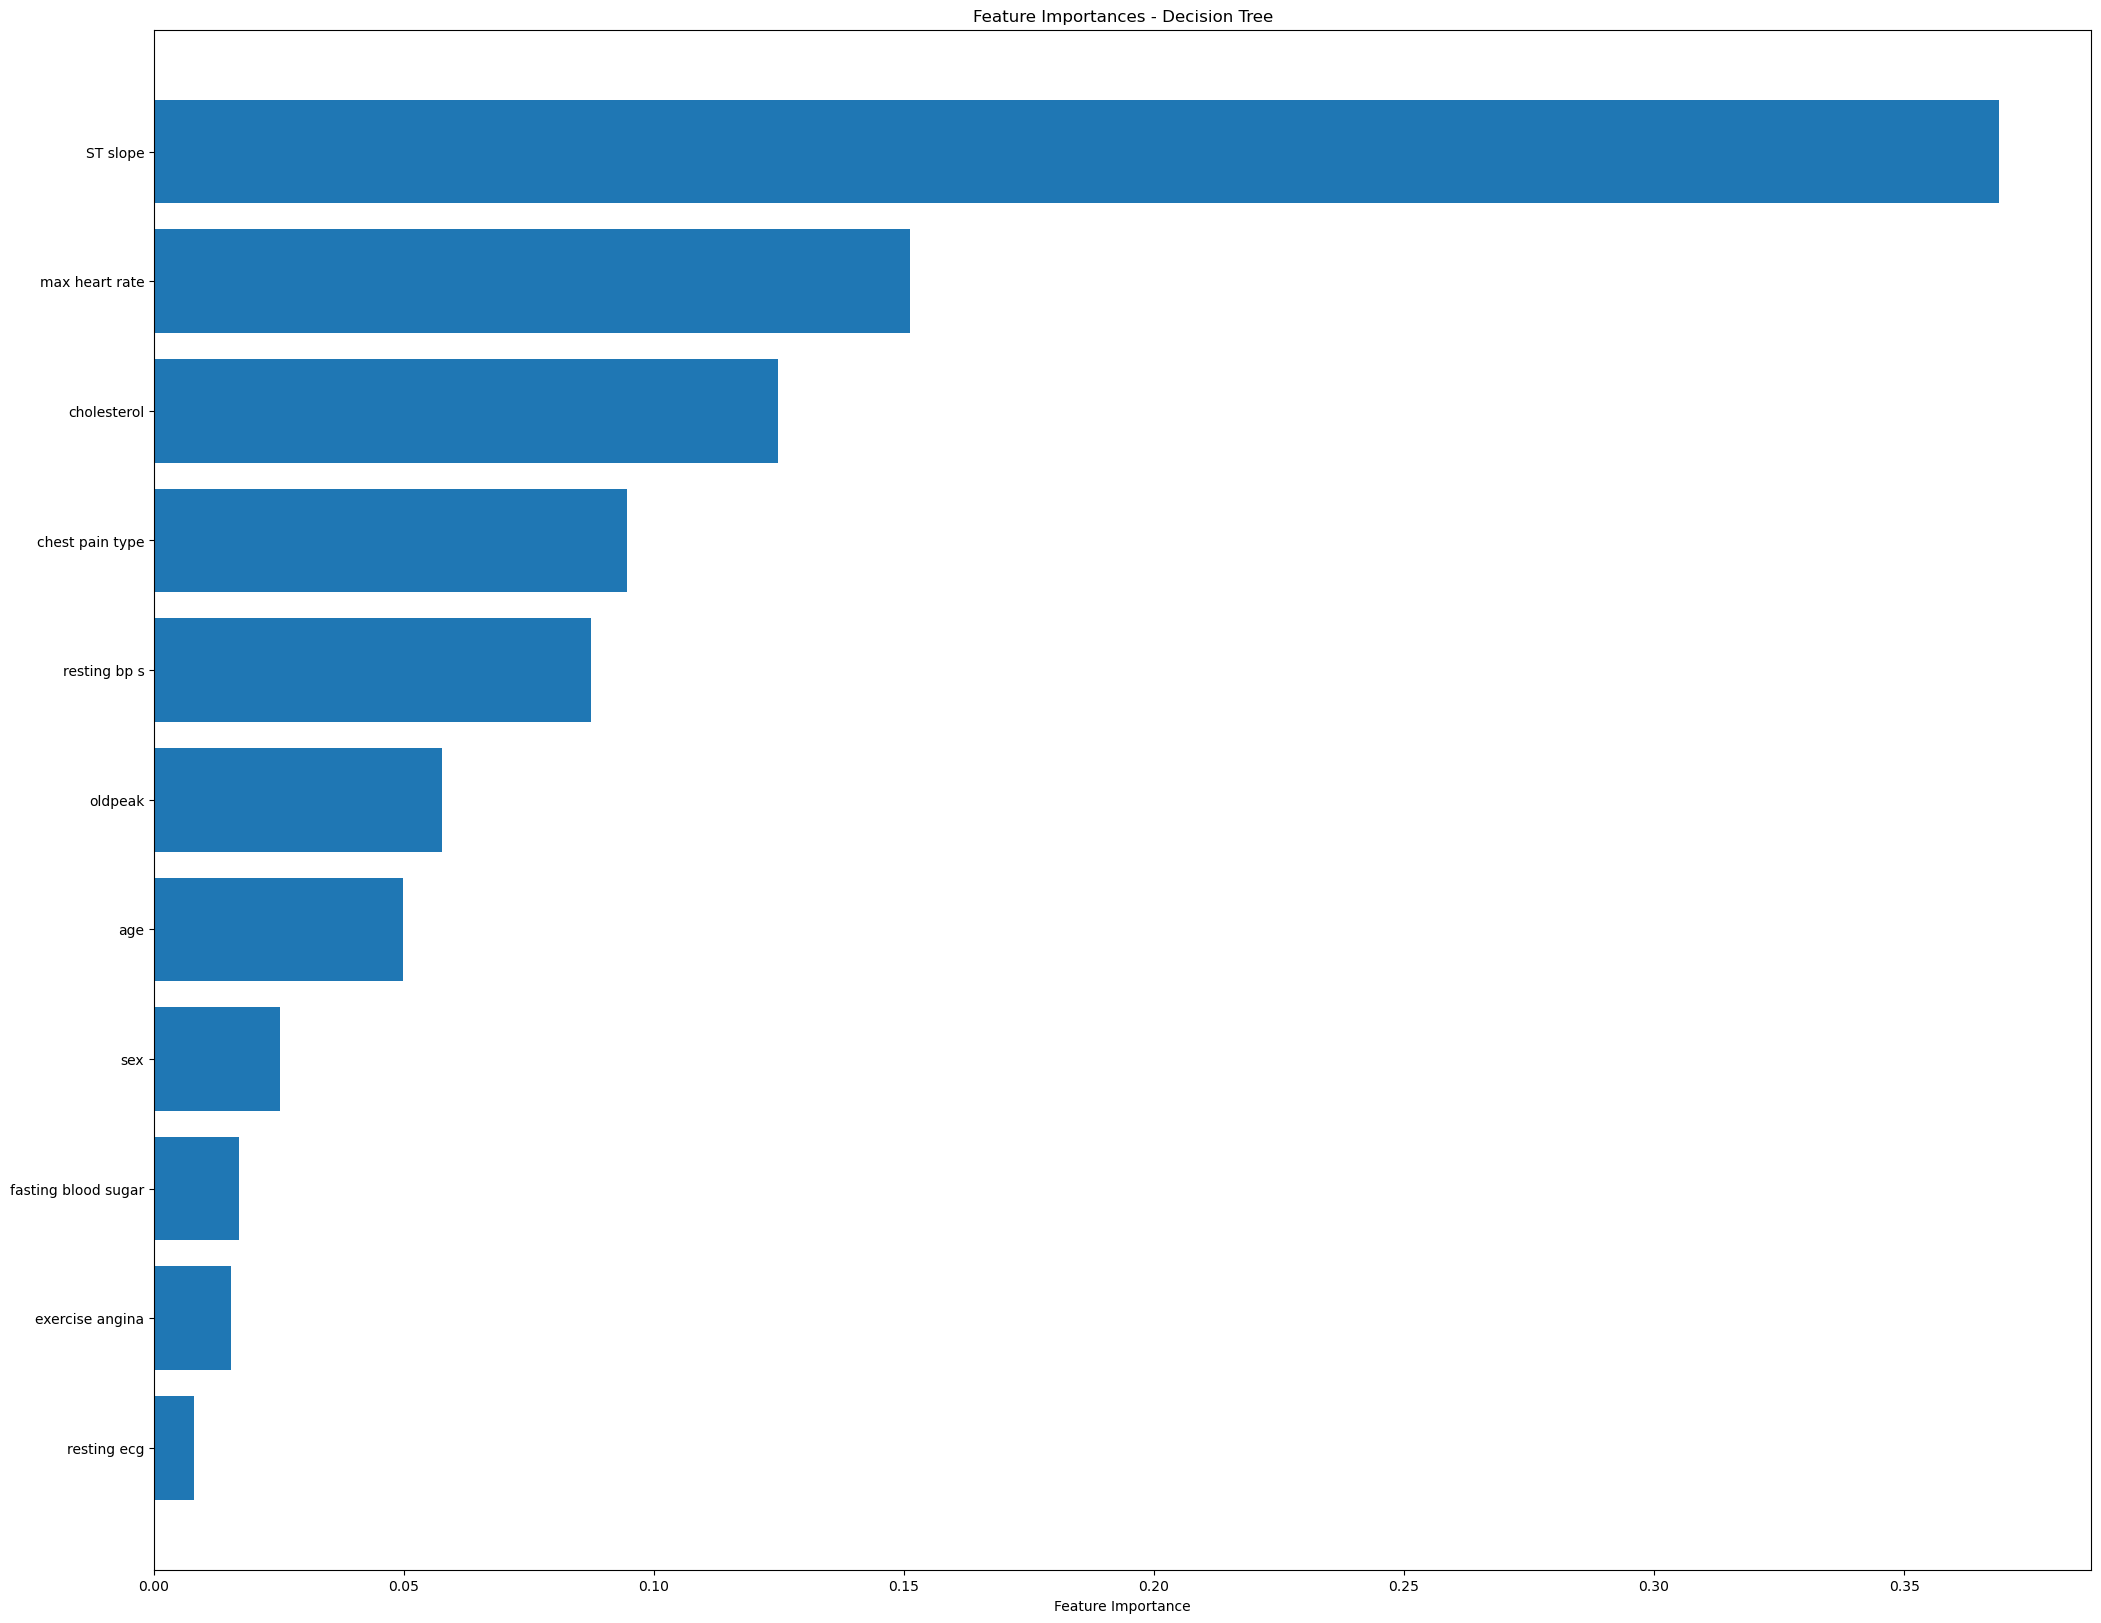

In [172]:
feature_importances = dtree_model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[-25:]
plt.figure(figsize=(25, 20))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances - Decision Tree')
plt.show()

#### 3) Random Forest

In [155]:
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_leaf = int(min_samples_leaf)
    min_samples_split = int(min_samples_split)

    rf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    return cross_val_score(rf, X_train, y_train, cv = 5, scoring = 'f1').mean()

pbounds = {
    'n_estimators': (10, 1000),
    'max_depth': (1, 100),
    'min_samples_split': (2, 16),
    'min_samples_leaf': (1, 16),
}

rf_bo = BayesianOptimization(
    f=rf_cv, 
    pbounds=pbounds, 
    random_state=42
)
rf_bo.maximize(n_iter=64)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.8555    | 38.08     | 15.26     | 12.25     | 602.7     |
| 2         | 0.8858    | 16.45     | 3.34      | 2.813     | 867.5     |
| 3         | 0.8603    | 60.51     | 11.62     | 2.288     | 970.2     |
| 4         | 0.8771    | 83.41     | 4.185     | 4.546     | 191.6     |
| 5         | 0.8648    | 31.12     | 8.871     | 8.047     | 298.3     |
| 6         | 0.8709    | 16.42     | 5.043     | 3.398     | 866.5     |
| 7         | 0.9158    | 14.3      | 1.089     | 2.415     | 868.8     |
| 8         | 0.8709    | 13.68     | 5.391     | 4.734     | 871.4     |
| 9         | 0.9034    | 10.65     | 1.637     | 5.299     | 860.9     |
| 10        | 0.8722    | 10.01     | 5.565     | 4.197     | 863.6     |
| 11        | 0.9146    | 13.77     | 1.934     | 4.73      | 869.0     |
| 12        | 0.895     | 12.87     | 

In [156]:
best_params = rf_bo.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_samples_leaf'] = int(best_params['min_samples_leaf'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])

rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'], 
    max_depth=best_params['max_depth'], 
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=59, min_samples_split=4, n_estimators=875,
                       random_state=42)

In [159]:
print("Model: Random Forest Model")
EvaluateClassifier(y_test, adaboost_best.predict(X_test))

Model: Random Forest Model
_________________________________________________________
-----------------Model Evaluation------------------------
Recall: 0.8426395939086294
Accuracy: 0.8403361344537815
Precision: 0.8645833333333334
F1-Score: 0.853470437017995
_________________________________________________________
------------------Classification Report------------------
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       160
           1       0.86      0.84      0.85       197

    accuracy                           0.84       357
   macro avg       0.84      0.84      0.84       357
weighted avg       0.84      0.84      0.84       357

_________________________________________________________
--------------------Confusion Matrix---------------------
[[134  26]
 [ 31 166]]
_________________________________________________________


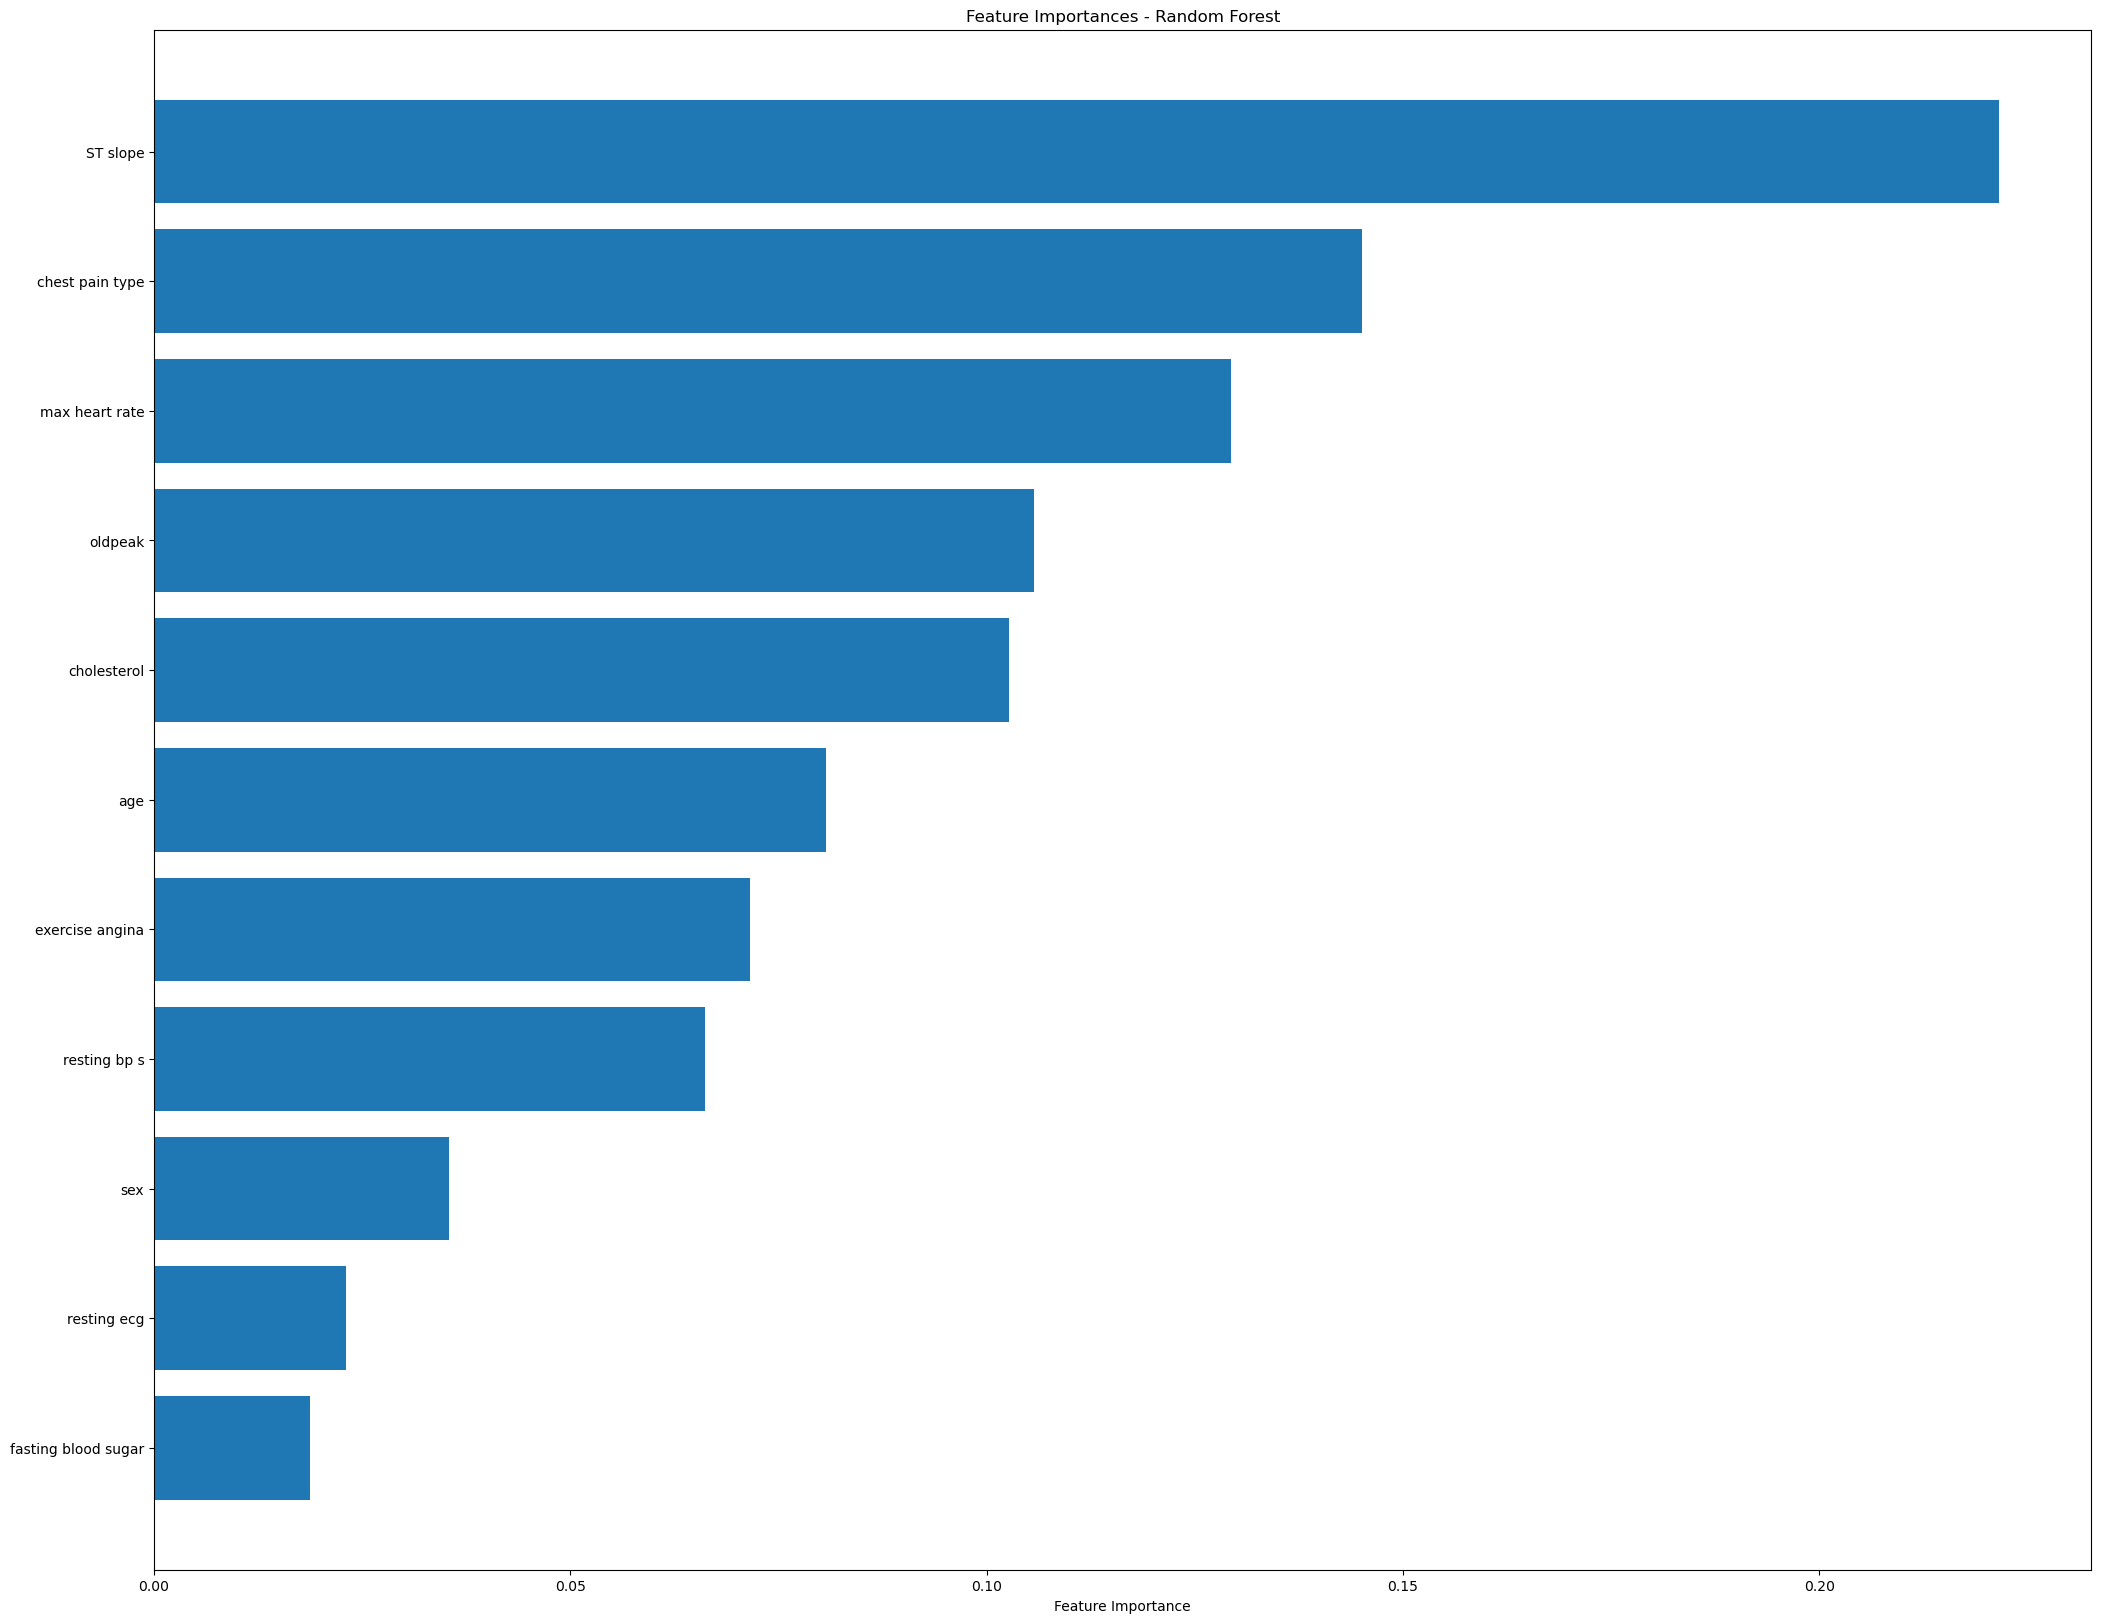

In [160]:
feature_importances = rf_best.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[-25:]
plt.figure(figsize=(25, 20))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances - Random Forest')
plt.show()

#### 4) AdaBoost

In [147]:
def adaboost_cv(n_estimators, learning_rate):
    n_estimators = int(n_estimators)
    
    adaboost = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=n_estimators, 
        learning_rate=learning_rate,
        random_state=42
    )
    return cross_val_score(adaboost, X_train, y_train, cv = 5, scoring = 'f1').mean()

pbounds = {
    'n_estimators': (10, 1000),
    'learning_rate': (0.001, 1),
}

adaboost_bo = BayesianOptimization(
    f=adaboost_cv, 
    pbounds=pbounds, 
    random_state=42
)
adaboost_bo.maximize(n_iter=64)

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
| 1         | 0.8489    | 0.3752    | 951.2     |
| 2         | 0.8489    | 0.7323    | 602.7     |
| 3         | 0.8489    | 0.1569    | 164.4     |
| 4         | 0.8489    | 0.05903   | 867.5     |
| 5         | 0.8489    | 0.6015    | 711.0     |
| 6         | 0.8489    | 0.7658    | 10.01     |
| 7         | 0.8489    | 0.8286    | 307.3     |
| 8         | 0.8489    | 0.1023    | 526.5     |
| 9         | 0.8489    | 0.3595    | 10.13     |
| 10        | 0.8489    | 0.9958    | 999.9     |
| 11        | 0.8489    | 0.5268    | 10.05     |
| 12        | 0.8489    | 0.4424    | 826.1     |
| 13        | 0.8489    | 0.0196    | 443.9     |
| 14        | 0.8489    | 0.3957    | 492.5     |
| 15        | 0.8489    | 0.6905    | 131.2     |
| 16        | 0.8489    | 0.6045    | 160.2     |
| 17        | 0.8489    | 0.9876    | 999.9     |
| 18        | 0.8489    | 0.9123    | 999.6     |


In [148]:
best_params = adaboost_bo.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])

adaboost_best = AdaBoostClassifier(
    n_estimators=best_params['n_estimators'], 
    learning_rate=best_params['learning_rate'], 
    random_state=42
)
adaboost_best.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.37516557872851514, n_estimators=951,
                   random_state=42)

In [157]:
print("Model: AdaBoost Model")
EvaluateClassifier(y_test, adaboost_best.predict(X_test))

Model: AdaBoost Model
_________________________________________________________
-----------------Model Evaluation------------------------
Recall: 0.8426395939086294
Accuracy: 0.8403361344537815
Precision: 0.8645833333333334
F1-Score: 0.853470437017995
_________________________________________________________
------------------Classification Report------------------
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       160
           1       0.86      0.84      0.85       197

    accuracy                           0.84       357
   macro avg       0.84      0.84      0.84       357
weighted avg       0.84      0.84      0.84       357

_________________________________________________________
--------------------Confusion Matrix---------------------
[[134  26]
 [ 31 166]]
_________________________________________________________


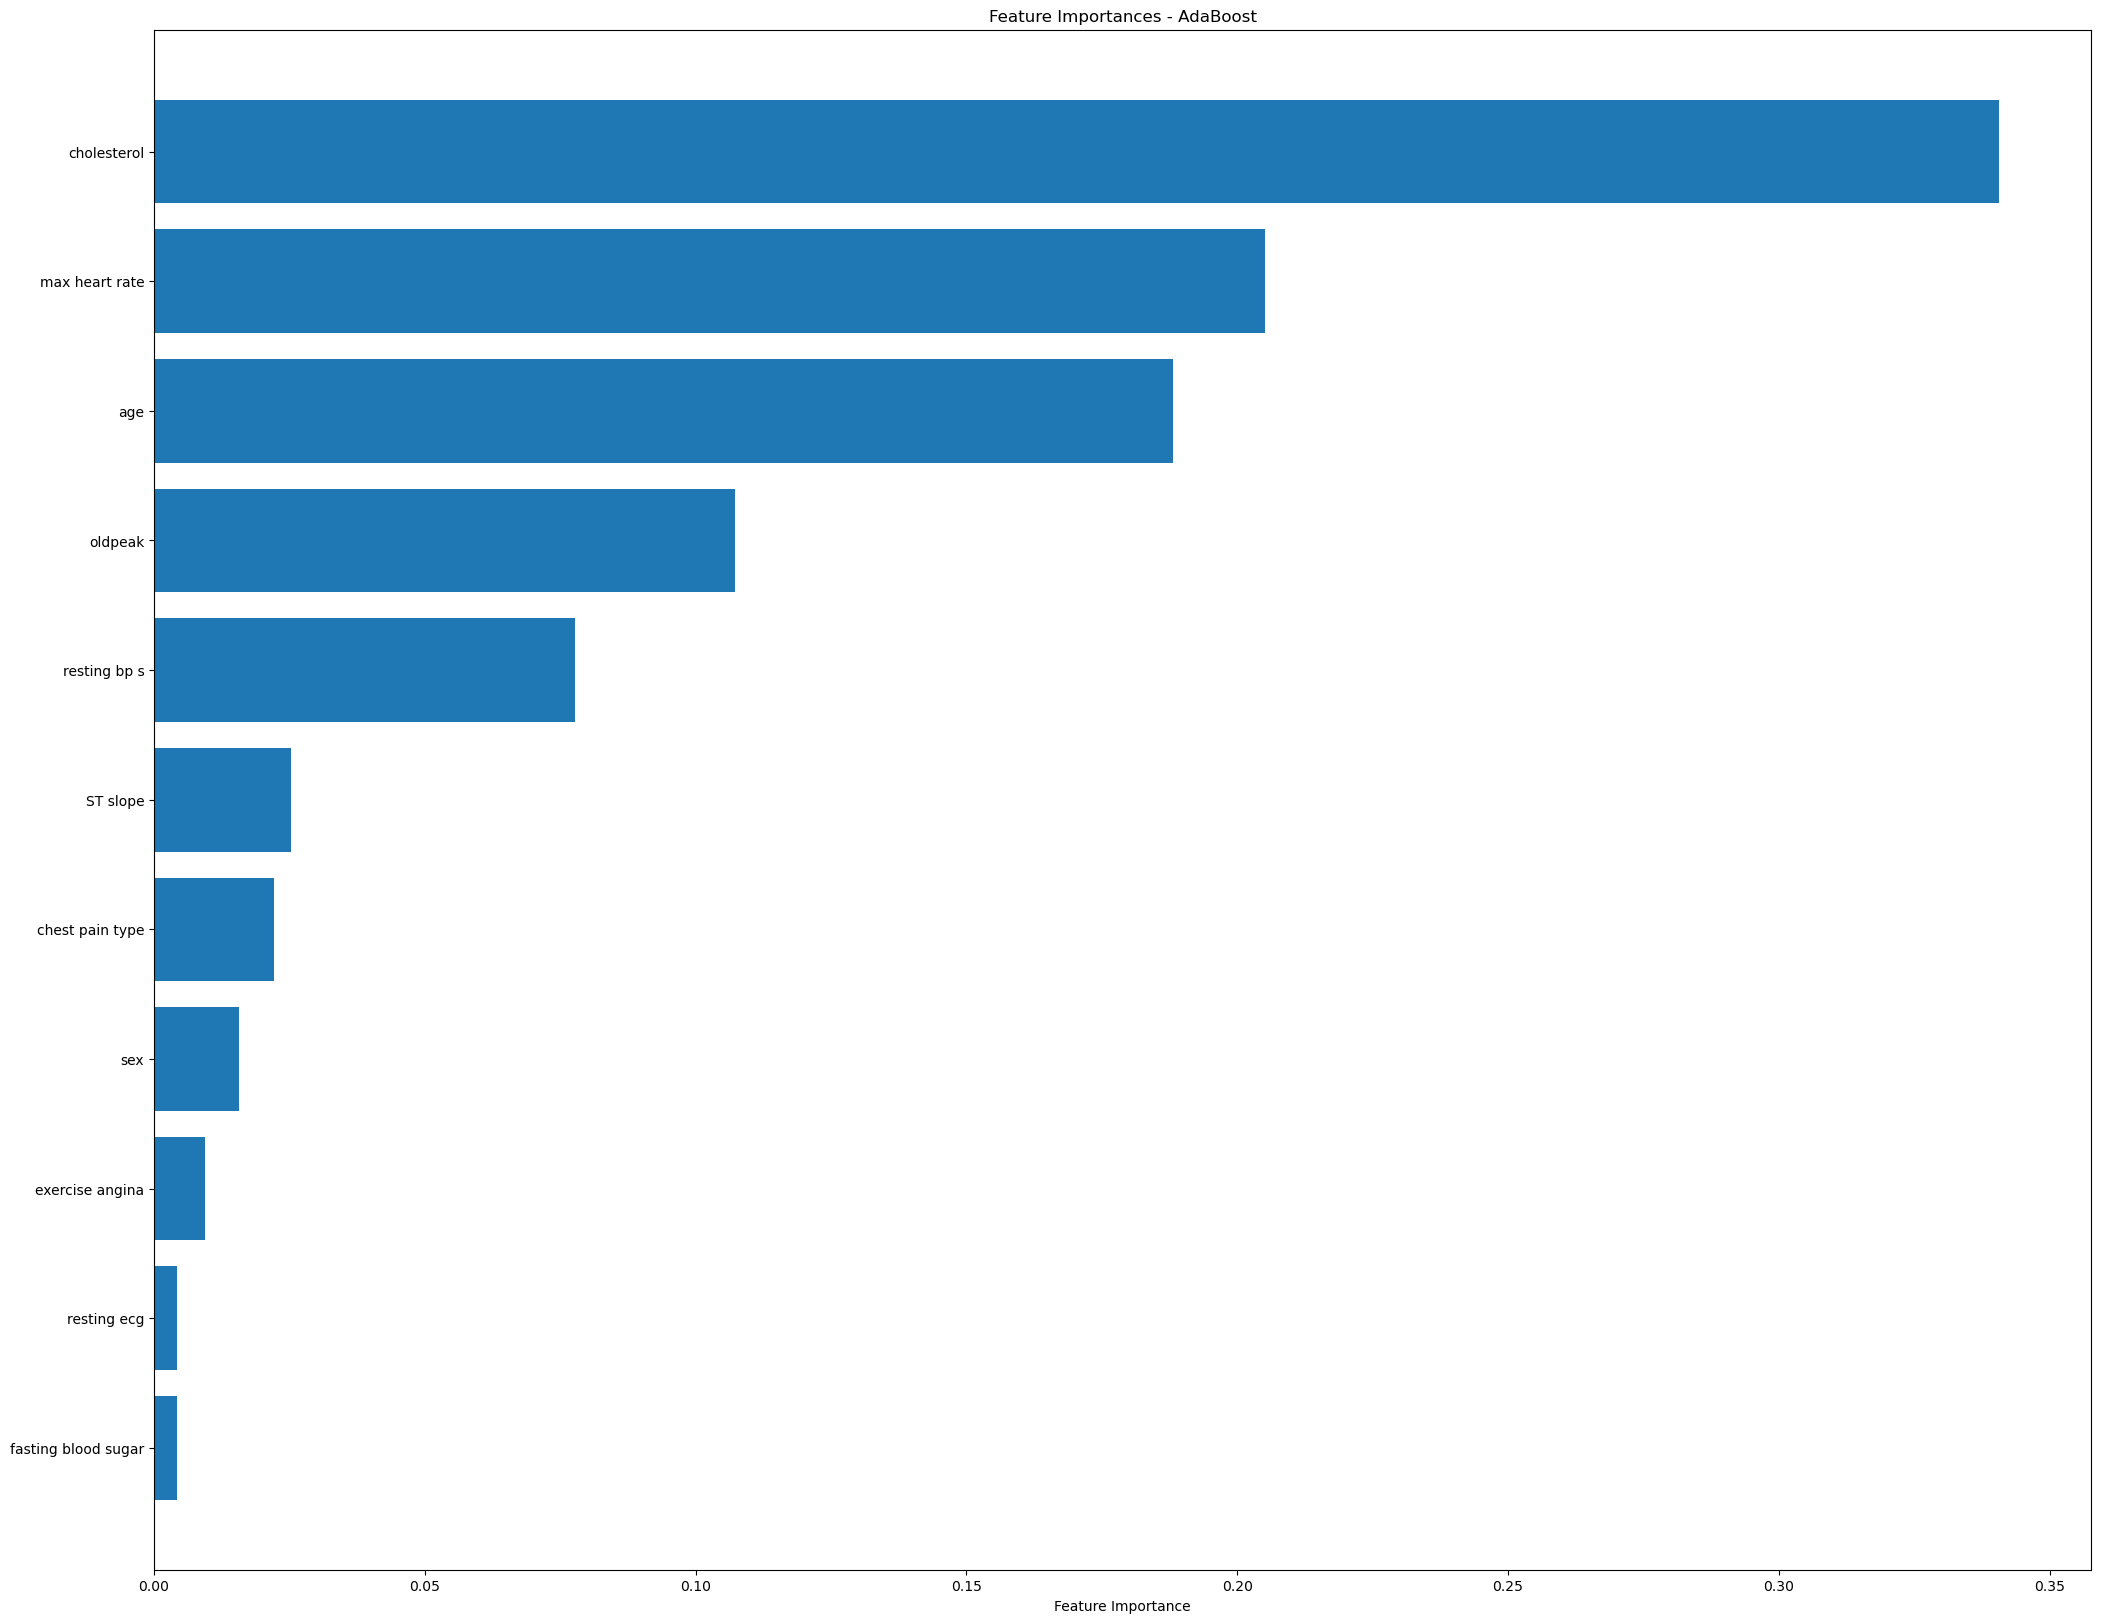

In [158]:
feature_importances = adaboost_best.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[-25:]
plt.figure(figsize=(25, 20))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances - AdaBoost')
plt.show()

#### 5) XGBoost

In [139]:
def xgboost_cv(n_estimators, max_depth, num_leaves, colsample_bytree, subsample, eta):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    num_leaves = int(num_leaves)
    
    xgboost = XGBClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        num_leaves=num_leaves,
        colsample_bytree=colsample_bytree,
        subsample=subsample,
        eta = eta,
        random_state=42
    )
    return cross_val_score(xgboost, X_train, y_train, cv = 5, scoring = 'f1').mean()

pbounds = {
    'n_estimators': (10, 1000),
    'max_depth': (1, 32),
    'num_leaves': (10, 90),
    'colsample_bytree': (0.5, 0.9),
    'subsample': (0.5, 1),
    'eta':(0.001, 1),
}

xgboost_bo = BayesianOptimization(
    f=xgboost_cv, 
    pbounds=pbounds, 
    random_state=42
)
xgboost_bo.maximize(n_iter=64)

|   iter    |  target   | colsam... |    eta    | max_depth | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | 0.871     | 0.6498    | 0.9508    | 23.69     | 602.7     | 22.48     | 0.578     |
| 2         | 0.8948    | 0.5232    | 0.8663    | 19.63     | 711.0     | 11.65     | 0.985     |
| 3         | 0.8955    | 0.833     | 0.2131    | 6.637     | 191.6     | 34.34     | 0.7624    |
| 4         | 0.8994    | 0.6728    | 0.2919    | 19.97     | 148.1     | 33.37     | 0.6832    |
| 5         | 0.8825    | 0.6824    | 0.7854    | 7.19      | 519.1     | 57.39     | 0.5232    |
| 6         | 0.8486    | 0.9       | 1.0       | 1.0       | 89.74     | 90.0      | 1.0       |
| 7         | 0.8948    | 0.7244    | 0.9745    | 20.53     | 148.3     | 31.4      | 0.6387    |
| 8         | 0.8763    | 0.5       | 0.001     | 16.45     | 146.1     | 46.42     | 0.989     |
| 9         | 0.9053

In [140]:
best_params = xgboost_bo.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params['num_leaves'] = int(best_params['num_leaves'])

xgboost_best = XGBClassifier(
    n_estimators=best_params['n_estimators'], 
    max_depth=best_params['max_depth'], 
    num_leaves=best_params['num_leaves'],
    colsample_bytree=best_params['colsample_bytree'],
    subsample=best_params['subsample'],
    eta=best_params['eta'],
    random_state=42
)
xgboost_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6016910330540726, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.03641121679328878, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=22, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=178, n_jobs=None, num_leaves=41, ...)

In [141]:
print("Model: XGBoost Model")
EvaluateClassifier(y_test, xgboost_best.predict(X_test))

Model: XGBoost Model
_________________________________________________________
-----------------Model Evaluation------------------------
Recall: 0.934010152284264
Accuracy: 0.9187675070028011
Precision: 0.92
F1-Score: 0.9269521410579346
_________________________________________________________
------------------Classification Report------------------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       160
           1       0.92      0.93      0.93       197

    accuracy                           0.92       357
   macro avg       0.92      0.92      0.92       357
weighted avg       0.92      0.92      0.92       357

_________________________________________________________
--------------------Confusion Matrix---------------------
[[144  16]
 [ 13 184]]
_________________________________________________________


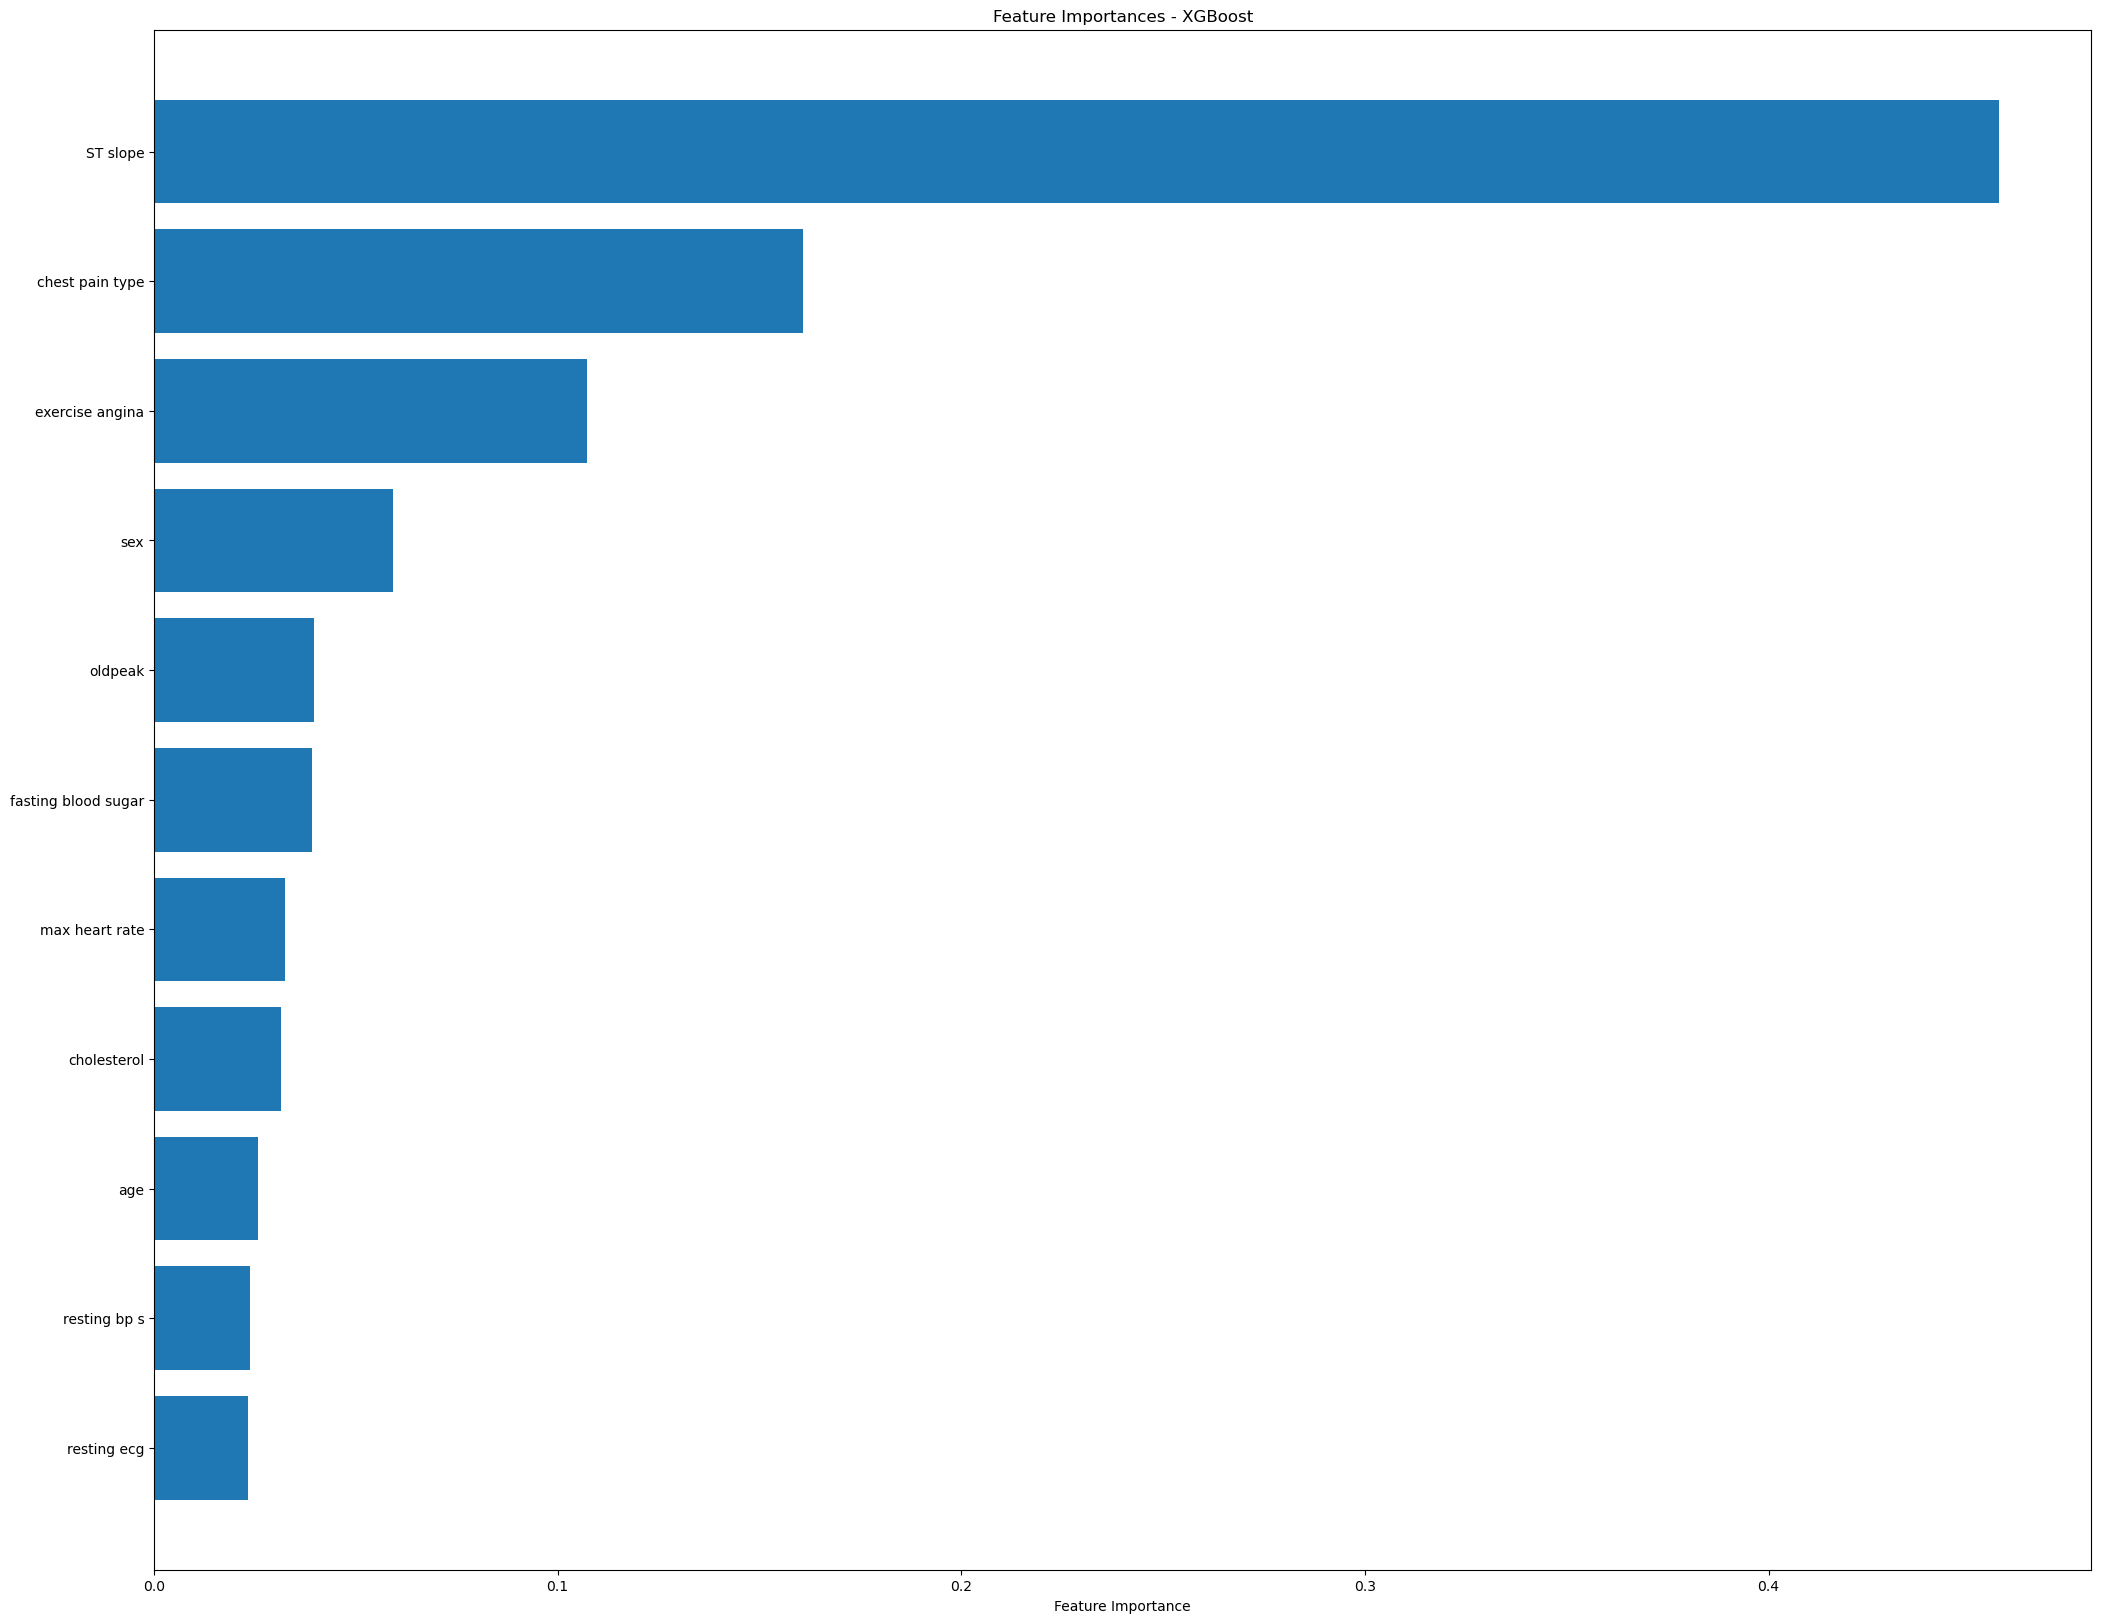

In [161]:
feature_importances = xgboost_best.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[-25:]

plt.figure(figsize=(25, 20))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances - XGBoost')
plt.show()

#### 6) LGBM

In [143]:
def lightgbm_cv(n_estimators, max_depth, learning_rate, num_leaves, colsample_bytree, subsample):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    num_leaves = int(num_leaves)
    
    lgbm = LGBMClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        learning_rate=learning_rate,
        num_leaves=num_leaves,
        colsample_bytree=colsample_bytree,
        subsample=subsample,
        random_state=42
    )
    return cross_val_score(lgbm, X_train, y_train, cv = 5, scoring = 'f1').mean()

pbounds = {
    'n_estimators': (10, 1000),
    'max_depth': (1, 32),
    'learning_rate': (0.001, 1),
    'num_leaves': (10, 90),
    'colsample_bytree': (0.5, 0.9),
    'subsample': (0.5, 1)
}

lightgbm_bo = BayesianOptimization(
    f=lightgbm_cv, 
    pbounds=pbounds, 
    random_state=42
)
lightgbm_bo.maximize(n_iter=64)

|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 346, number of negative: 320
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 666, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.519520 -> initscore=0.078118
[LightGBM] [Info] Start training from score 0.078118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [144]:
best_params = lightgbm_bo.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params['num_leaves'] = int(best_params['num_leaves'])

lightgbm_best = LGBMClassifier(
    n_estimators=best_params['n_estimators'], 
    max_depth=best_params['max_depth'], 
    learning_rate=best_params['learning_rate'], 
    num_leaves=best_params['num_leaves'],
    colsample_bytree=best_params['colsample_bytree'],
    subsample=best_params['subsample'],
    random_state=42
)
lightgbm_best.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 432, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518607 -> initscore=0.074464
[LightGBM] [Info] Start training from score 0.074464
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMClassifier(colsample_bytree=0.7560844947000054,
               learning_rate=0.03956574127491208, max_depth=21,
               n_estimators=210, num_leaves=78, random_state=42,
               subsample=0.6714269904866697)

In [145]:
print("Model: LightGBM Model")
EvaluateClassifier(y_test, lightgbm_best.predict(X_test))

Model: LightGBM Model
_________________________________________________________
-----------------Model Evaluation------------------------
Recall: 0.9289340101522843
Accuracy: 0.9131652661064426
Precision: 0.915
F1-Score: 0.9219143576826196
_________________________________________________________
------------------Classification Report------------------
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       160
           1       0.92      0.93      0.92       197

    accuracy                           0.91       357
   macro avg       0.91      0.91      0.91       357
weighted avg       0.91      0.91      0.91       357

_________________________________________________________
--------------------Confusion Matrix---------------------
[[143  17]
 [ 14 183]]
_________________________________________________________


##### Feature Importance

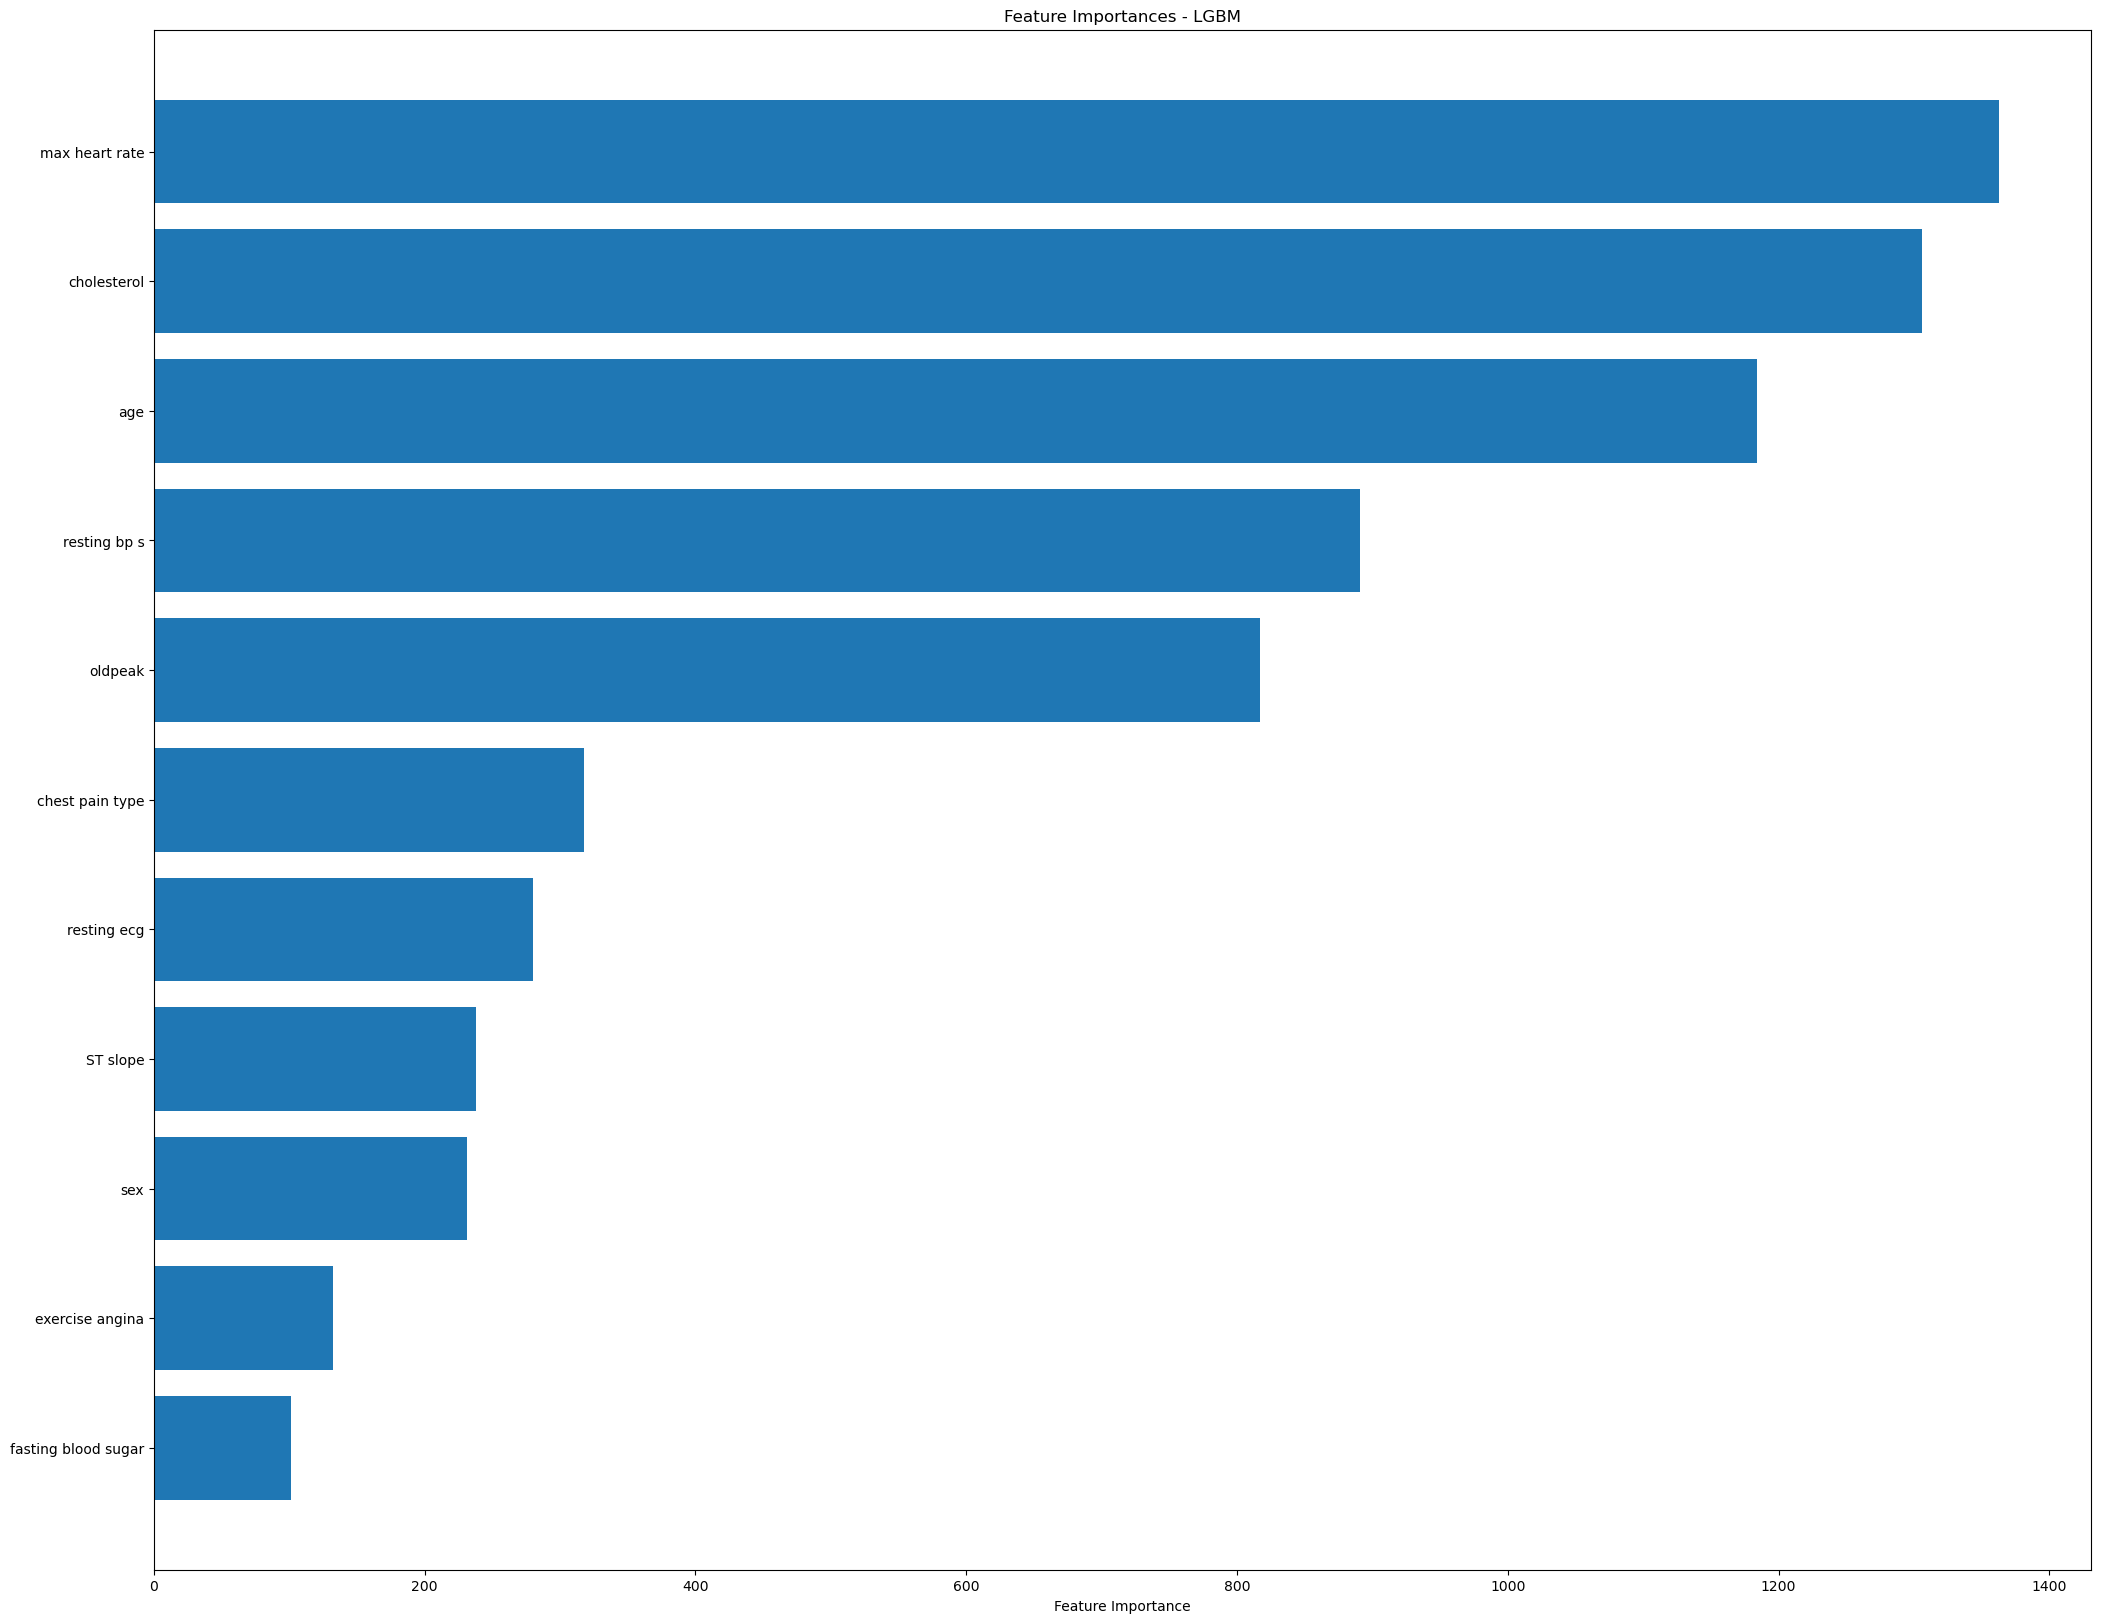

In [146]:
feature_importances = lightgbm_best.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[-25:]

plt.figure(figsize=(25, 20))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances - LGBM')
plt.show()